C:\Users\Prasoon Gupta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


diabetes dataset has 768 data points with 9 variables each.


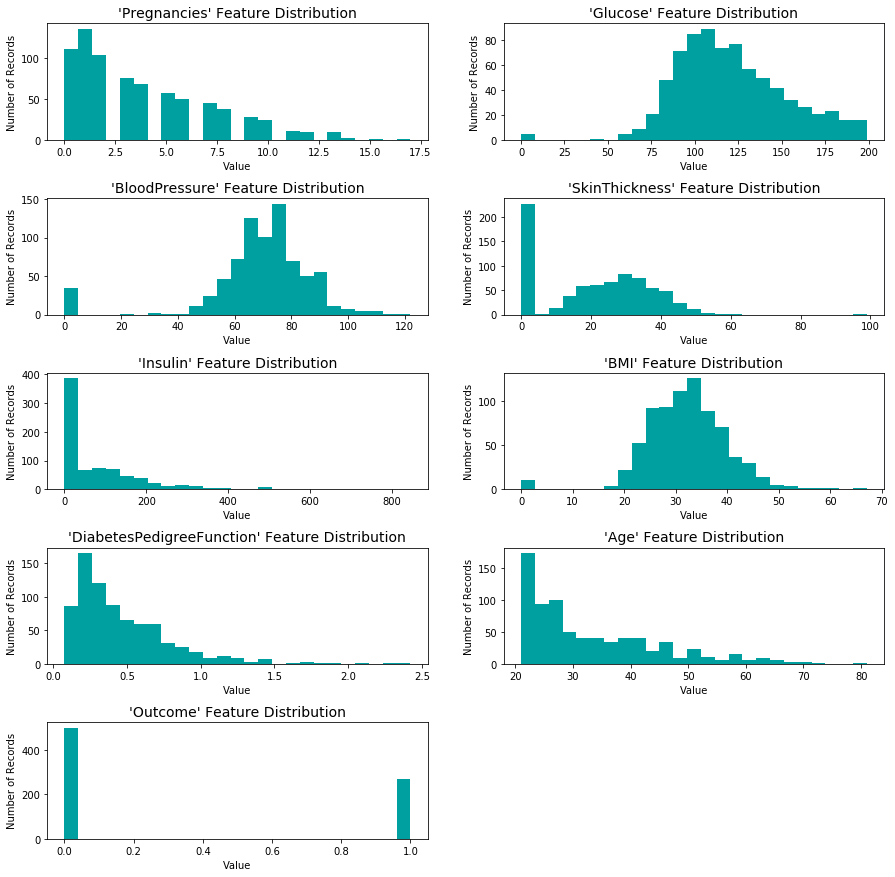

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('diabetes.csv')
outcome = data['Outcome']
features = data.drop('Outcome', axis = 1)
vs.distribution(data)
#vs.distribution(outcome)
    
# Success
print("diabetes dataset has {} data points with {} variables each.".format(*data.shape))

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness',
                                'Insulin','BMI','DiabetesPedigreeFunction','Age']

features_transform = pd.DataFrame(data = features)
features_transform[numerical] = scaler.fit_transform(features_transform[numerical])

# Show an example of a record with scaling applied
display(features_transform.head(n = 5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [4]:
pd.DataFrame(features).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features_transform, outcome, test_size=0.20, train_size=0.80,random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score, f1_score
simpleModel=LogisticRegression()
simpleModel.fit(X_train,y_train)
y_predSimpleModel=simpleModel.predict(X_test)
y_train_pred=simpleModel.predict(X_train)
print('accuracy on training set: ', accuracy_score(y_train, y_train_pred))
print('accuracy on testing set: ', accuracy_score(y_test, y_predSimpleModel))
print('precision on training set: ', fbeta_score(y_train, y_train_pred, beta=1))
print('precision on testing set: ', fbeta_score(y_test, y_predSimpleModel, beta=1))

accuracy on training set:  0.754071661237785
accuracy on testing set:  0.7857142857142857
precision on training set:  0.5722379603399433
precision on testing set:  0.6666666666666665


In [17]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def train_predict(learner, X_train,y_train): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    
    scores=cross_validate(learner, X_train, y_train, cv=5, scoring=['accuracy', 'f1'],return_train_score=True)

       
    # Success
    #print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    clf_name=learner.__class__.__name__
    print(clf_name)
    print('training set accuracy:{0:.4f}'.format(scores['train_accuracy'].mean()),'({0:.4f})'.format(scores['train_accuracy'].std()))
    print('testing set accuracy:{0:.4f}'.format(scores['test_accuracy'].mean()),'({0:.4f})'.format(scores['test_accuracy'].std()))
    print('training set f1 score:{0:.4f}'.format(scores['train_f1'].mean()),'({0:.4f})'.format(scores['train_f1'].std()))
    print('testing set f1 score:{0:.4f}'.format(scores['test_f1'].mean()),'({0:.4f})'.format(scores['test_f1'].std()))
    print('\n\n')
        
    # Return the results
    return results

In [18]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

classifiers=[DecisionTreeClassifier(random_state=42), 
             AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), random_state=42),
             MultinomialNB(),
             SVC(kernel="linear"),
             SVC(kernel="rbf"),
             RandomForestClassifier(),
             GaussianNB()]
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), random_state=42)
clf_C = MultinomialNB()
results={}
for i, clf in enumerate(classifiers):
    #clf_name=clf.__class__.__name__
    train_predict(clf,X_train, y_train)

DecisionTreeClassifier
training set accuracy:1.0000 (0.0000)
testing set accuracy:0.7329 (0.0474)
training set f1 score:1.0000 (0.0000)
testing set f1 score:0.6212 (0.0575)



AdaBoostClassifier
training set accuracy:0.9959 (0.0029)
testing set accuracy:0.7426 (0.0258)
training set f1 score:0.9941 (0.0042)
testing set f1 score:0.6271 (0.0346)



MultinomialNB
training set accuracy:0.6531 (0.0006)
testing set accuracy:0.6531 (0.0024)
training set f1 score:0.0000 (0.0000)
testing set f1 score:0.0000 (0.0000)





C:\Users\Prasoon Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Prasoon Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Prasoon Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Prasoon Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Prasoon Gupta\Anaconda3\lib\site-packages\sklearn\m

SVC
training set accuracy:0.7683 (0.0078)
testing set accuracy:0.7590 (0.0314)
training set f1 score:0.6132 (0.0122)
testing set f1 score:0.5973 (0.0532)



SVC
training set accuracy:0.7537 (0.0076)
testing set accuracy:0.7509 (0.0255)
training set f1 score:0.5450 (0.0229)
testing set f1 score:0.5372 (0.0488)



RandomForestClassifier
training set accuracy:0.9776 (0.0038)
testing set accuracy:0.7200 (0.0229)
training set f1 score:0.9668 (0.0058)
testing set f1 score:0.5477 (0.0214)



GaussianNB
training set accuracy:0.7516 (0.0109)
testing set accuracy:0.7508 (0.0249)
training set f1 score:0.6220 (0.0154)
testing set f1 score:0.6164 (0.0348)





It seems like the SVC regrressor with a 'linear' kernel gives the best testing and testing accuracy, moreover its f1 score is also pretty high on both testing and training. This closeness of scores on training and testing set and their high values show the model is neither overfitting nor underfitting the data. Hence SVC with linear Kernel seems the best regressor. 

The Naive Bayes method also seems pretty good here but I am going to optimize using the SVC (linear kernel) method, just as a matter of choice

In [19]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = SVC(kernel="linear")
parameters={'C':[0.4, 0.5, 0.7, 0.8, 0.9, 1]}
scorer = make_scorer(fbeta_score, beta=1)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=10)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
print(best_clf)

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 1)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1)))

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Unoptimized model
------
Accuracy score on testing data: 0.7597
F-score on testing data: 0.6476

Optimized Model
------
Final accuracy score on the testing data: 0.7662
Final F-score on the testing data: 0.6538


In [20]:
from sklearn.metrics import confusion_matrix
cmf=confusion_matrix(y_test, best_predictions)
print('sensitivity: ', cmf[1][1]/(cmf[1][1]+cmf[0][1]))
print('precision: ', cmf[1][1]/(cmf[1][1]+cmf[1][0]))

sensitivity:  0.6938775510204082
precision:  0.6181818181818182


It seems like the accuracy is not much better with the SVC model compared to the simple logistic model, but the precision and sensitivity are slightly better.  

Here, trying to show the five most important features in determnining the diabetes status of a person, 

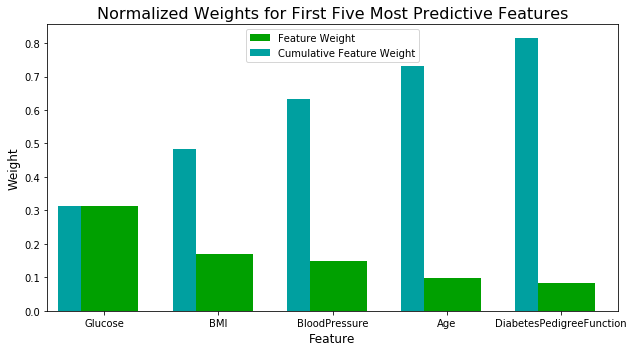

In [21]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
vs.feature_plot(importances, X_train, y_train)